In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/ex/mldl/data/wine_copy.csv', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
6497 * 0.8

5197.6

In [7]:
6497 * 0.2

1299.4

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [52]:
# modelpath="./model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
modelpath="./model/all4/best_model.keras"

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
# patience=20 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습종료하라

In [56]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [57]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)

In [58]:
model3 = Sequential()
model3.add(Dense(36, input_dim=12, activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/2000


c:\ProgramData\anaconda3\envs\mldl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 775ms/step - accuracy: 0.8780 - loss: 0.4033
Epoch 1: val_loss improved from inf to 0.32848, saving model to ./model/all4/best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8748 - loss: 0.3526 - val_accuracy: 0.8754 - val_loss: 0.3285
Epoch 2/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8980 - loss: 0.2584
Epoch 2: val_loss improved from 0.32848 to 0.25809, saving model to ./model/all4/best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9014 - loss: 0.2583 - val_accuracy: 0.9108 - val_loss: 0.2581
Epoch 3/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9160 - loss: 0.2377
Epoch 3: val_loss improved from 0.25809 to 0.22175, saving model to ./model/all4/best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9248 - loss: 0.2164 - val_accuracy: 0.9223 - val_loss: 0.2218
Epoch 4/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9260 - loss: 0.2000
Epoch 4: val_loss improved from 0.22175 to

validation_split<br>
검증 데이터로 사용될 훈련 데이터의 비율입니다. 모델은 훈련 데이터의 이 부분을 구분하고, 각 에포크가 끝날 때 이 데이터에 대한 손실과 모델 측정항목을 평가

In [18]:
print(5197 * 0.75, 5197 * 0.25)

3897.75 1299.25


In [19]:
import matplotlib.pyplot as plt

In [59]:
history3

In [60]:
history3.history

{'accuracy': [0.8737490177154541,
  0.9042853713035583,
  0.924044132232666,
  0.9330254197120667,
  0.9353348612785339,
  0.936874508857727,
  0.937644362449646,
  0.9381575584411621,
  0.9373877048492432,
  0.9399538040161133,
  0.9407236576080322,
  0.9396972060203552,
  0.9396972060203552,
  0.9409802556037903,
  0.9399538040161133,
  0.9420066475868225,
  0.9417500495910645,
  0.9425199031829834,
  0.9417500495910645,
  0.9414934515953064,
  0.9402104020118713,
  0.9414934515953064,
  0.9438029527664185,
  0.9440595507621765,
  0.9438029527664185,
  0.9453426003456116,
  0.9473954439163208,
  0.9471388459205627,
  0.9463689923286438,
  0.9468821883201599,
  0.948165237903595,
  0.9473954439163208,
  0.9468821883201599,
  0.9489350914955139,
  0.9499614834785461,
  0.94944828748703,
  0.950218141078949,
  0.949191689491272,
  0.9507313370704651,
  0.9512445330619812,
  0.9522709846496582,
  0.9527841806411743,
  0.9532974362373352,
  0.9535540342330933,
  0.9550936818122864,
  0.95

In [61]:
history3.history['val_accuracy']

[0.8753846287727356,
 0.9107692241668701,
 0.9223076701164246,
 0.9284615516662598,
 0.9284615516662598,
 0.9300000071525574,
 0.9330769181251526,
 0.931538462638855,
 0.9338461756706238,
 0.9330769181251526,
 0.9330769181251526,
 0.9346153736114502,
 0.9346153736114502,
 0.9361538290977478,
 0.9361538290977478,
 0.936923086643219,
 0.936923086643219,
 0.9384615421295166,
 0.9346153736114502,
 0.9353846311569214,
 0.9361538290977478,
 0.9384615421295166,
 0.9384615421295166,
 0.9384615421295166,
 0.939230740070343,
 0.9407692551612854,
 0.9407692551612854,
 0.9407692551612854,
 0.9384615421295166,
 0.942307710647583,
 0.9438461661338806,
 0.9438461661338806,
 0.9438461661338806,
 0.944615364074707,
 0.9461538195610046,
 0.9438461661338806,
 0.9461538195610046,
 0.9469230771064758,
 0.9461538195610046,
 0.942307710647583,
 0.947692334651947,
 0.9461538195610046,
 0.947692334651947,
 0.947692334651947,
 0.9484615325927734,
 0.949999988079071,
 0.949999988079071,
 0.949999988079071,
 0.95

In [62]:
len(history3.history['val_accuracy'])

230

In [63]:
history3_df = pd.DataFrame(history3.history)

In [64]:
history3_df

,accuracy,loss,val_accuracy,val_loss
0,0.873749,0.333835,0.875385,0.328477
1,0.904285,0.260201,0.910769,0.258091
2,0.924044,0.213518,0.922308,0.221753
3,0.933025,0.196699,0.928462,0.211582
4,0.935335,0.190007,0.928462,0.208761
...,...,...,...,...
225,0.990762,0.036693,0.983846,0.070418
226,0.989479,0.037619,0.984615,0.070612
227,0.989222,0.036112,0.985385,0.071013
228,0.989479,0.037461,0.984615,0.071151


In [65]:
y_loss = history3_df['loss']
y_vloss = history3_df['val_loss']

In [66]:
x_len = np.arange(len(y_loss))

In [67]:
x_len

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

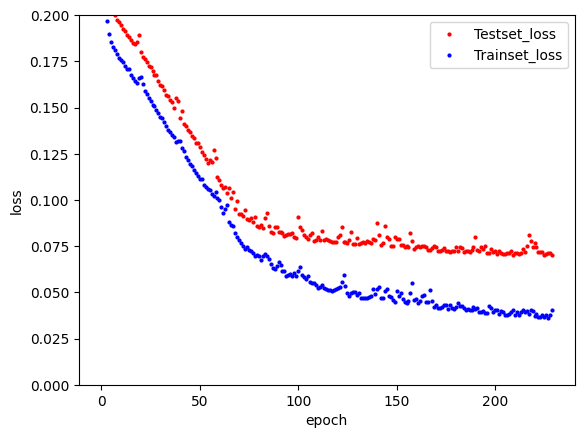

In [68]:
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0, 0.2)
plt.show()

In [70]:
model3.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9865 - loss: 0.0410


[0.046542972326278687, 0.986923098564148]